# Completely Randomized Single-Factor Experiment
## EXAMPLE: TENSILE STRENGTH
A manufacturer of paper used for making grocery bags is interested in improving the prod-
uct’s tensile strength. Product engineering believes that tensile strength is a function of the 
hardwood concentration in the pulp and that the range of hardwood concentrations of practi-
cal interest is between 5 and 20%. A team of engineers responsible for the study decides to 
investigate four levels of hardwood concentration: 5%, 10%, 15%, and 20%. They decide to 
make up six test specimens at each concentration level by using a pilot plant. All 24 specimens 
are tested on a laboratory tensile tester in random order. The data from this experiment are 
shown in Table 13-1.

In [1]:
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import scipy.stats as st
%matplotlib inline

In [2]:
df = pd.read_excel('table 13-1.xlsx')
df.head()

,Hardwood,Strength
0,5,7
1,5,8
2,5,15
3,5,11
4,5,9


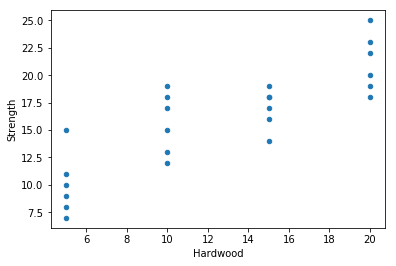

In [3]:
df.plot.scatter('Hardwood', 'Strength')

In [4]:
res = smf.ols('Strength ~ C(Hardwood)', data=df).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Strength   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     19.61
Date:                Tue, 21 Nov 2017   Prob (F-statistic):           3.59e-06
Time:                        10:25:37   Log-Likelihood:                -54.344
No. Observations:                  24   AIC:                             116.7
Df Residuals:                      20   BIC:                             121.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            10.0000      1.041      9.602      0.000       7.827      12.173
C(Hardwood)[T.10]     5.6667      1.473      3.847      0.001       2.594       8.739
C(Hardwood)[T.15]     7.0000      1.473      4.753      0.000       3.928      10.072
C(Hardwood)[T.20]    11.1667      1.473      7.581      0.000       8.094      14.239
==============================================================================
Omnibus:                        0.929   Durbin-Watson:                   2.181
Prob(Omnibus):                  0.628   Jarque-Bera (JB):                0.861
Skew:                           0.248   Prob(JB):                        0.650
Kurtosis:                       2.215   Cond. No.                         4.79
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## The Analysis of Variance

In [5]:
from statsmodels.stats.anova import anova_lm

In [6]:
anova_lm(res)

D:\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
D:\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
D:\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


,df,sum_sq,mean_sq,F,PR(>F)
C(Hardwood),3.0,382.791667,127.597222,19.605207,0.000004
Residual,20.0,130.166667,6.508333,NaN,NaN


## Tukey’s Test

In [7]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [8]:
comp = pairwise_tukeyhsd(df['Strength'], df['Hardwood'])
comp.summary()

group1,group2,meandiff,lower,upper,reject
5,10,5.6667,1.5439,9.7894,True
5,15,7.0,2.8773,11.1227,True
5,20,11.1667,7.0439,15.2894,True
10,15,1.3333,-2.7894,5.4561,False
10,20,5.5,1.3773,9.6227,True
15,20,4.1667,0.0439,8.2894,True


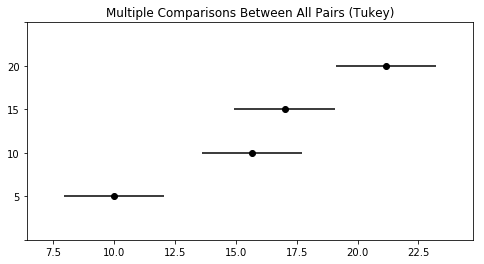

In [9]:
comp.plot_simultaneous(figsize=(8, 4));